In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("D:/DSML/DataSet/Loan_Data.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
(df.isnull().sum() / len(df)) * 100


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [75]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df.dropna(subset=['Married'],inplace=True)
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [76]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

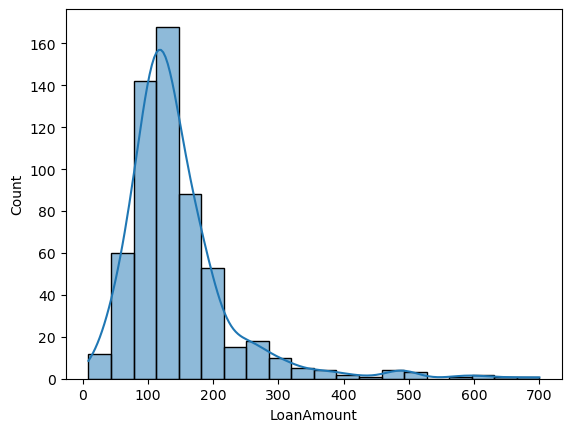

In [77]:
sns.histplot(df,x='LoanAmount',kde=True,bins=20)
plt.show()

In [78]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

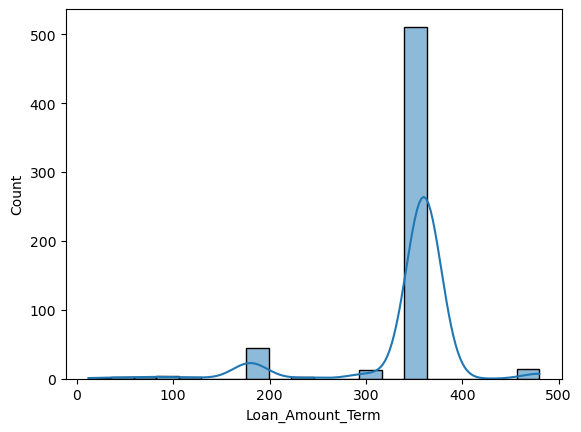

In [79]:
sns.histplot(df,x='Loan_Amount_Term',kde=True,bins=20)
plt.show()

In [80]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [81]:
df['Credit_History'].value_counts()

Credit_History
1.0    472
0.0     89
Name: count, dtype: int64

In [82]:
df['Credit_History'].value_counts()
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [83]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

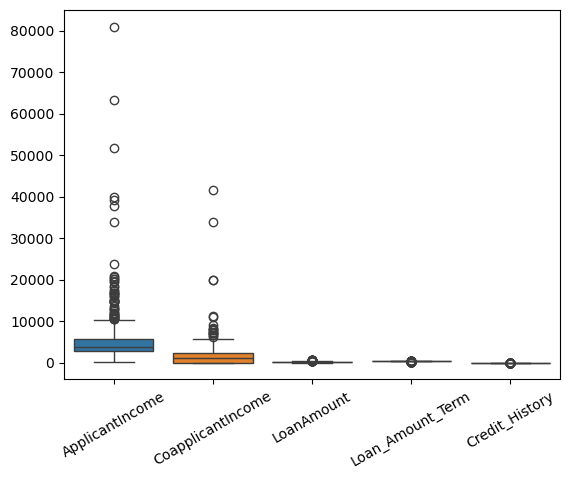

In [84]:
numeric=df.select_dtypes(['int','float'])
sns.boxplot(numeric)
plt.xticks(rotation=30)
plt.show()

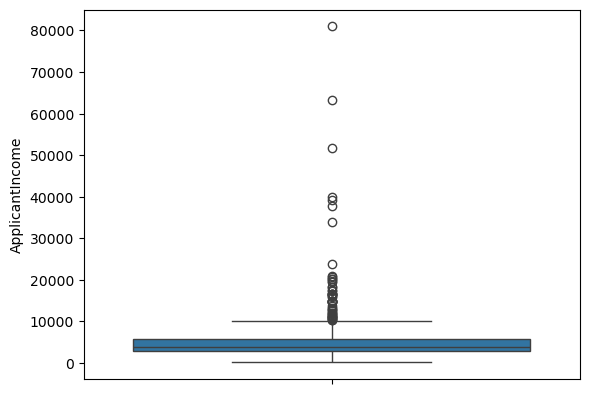

In [85]:
sns.boxplot(df,y='ApplicantIncome')
plt.show()

In [86]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [87]:
outlier=[]
for x in df['ApplicantIncome']:
    if (x<lower or x>upper):
        outlier.append(x)
print(outlier)
print('toatal number of outlier',len(outlier))

[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]
toatal number of outlier 50


In [88]:
(len(outlier) / len(df)) * 100


8.183306055646481

In [89]:
df['ApplicantIncome']=np.where(df['ApplicantIncome']>upper,upper,
                               np.where(df['ApplicantIncome']<lower,lower,df['ApplicantIncome']))

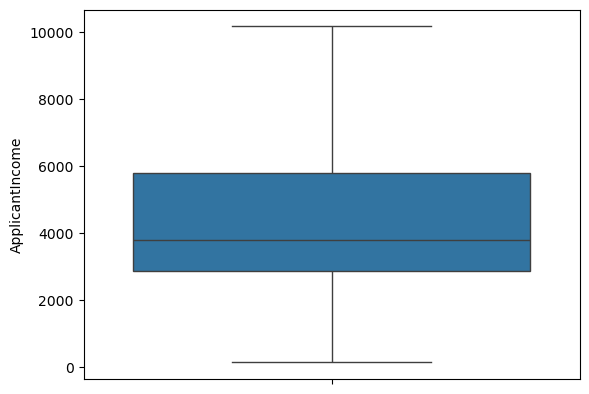

In [90]:
df['ApplicantIncome'].describe()
sns.boxplot(y=df['ApplicantIncome'])
plt.show()

In [93]:
outlier=[]
for x in df['ApplicantIncome']:
    if (x<lower or x>upper):
        outlier.append(x)
print(outlier)
print('total number of outlier',len(outlier))


[]
total number of outlier 0


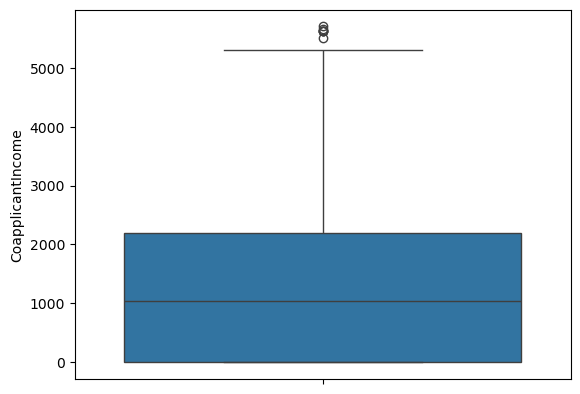

In [103]:
sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [104]:
q1=np.percentile(df['CoapplicantIncome'],25)
q3=np.percentile(df['CoapplicantIncome'],75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

-3282.0
5470.0


In [105]:
outlier=[]
for x in df['CoapplicantIncome']:
    if (x<lower or x>upper):
        outlier.append(x)
print(outlier)
print('number of outlier',len(outlier))
(len(outlier)/len(df)*100)

[5625.0, 5654.0, 5625.0, 5625.0, 5701.0, 5624.0, 5500.0]
number of outlier 7


1.1804384485666104

In [106]:
ind=df[df['CoapplicantIncome'].isin(outlier)].index
ind

Index([21, 91, 159, 173, 242, 502, 530], dtype='int64')

In [107]:
df.drop(ind, axis=0, inplace=True)


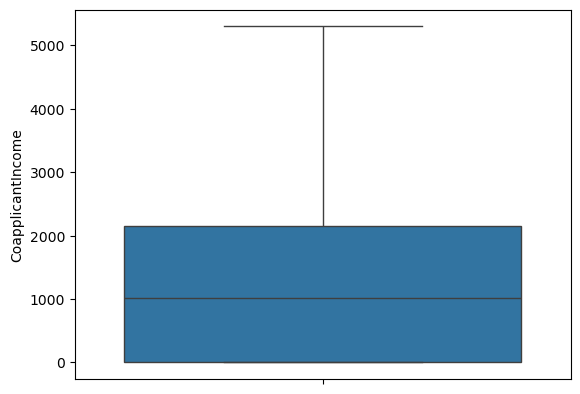

In [109]:
sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [110]:
outlier=[]
for x in df['CoapplicantIncome']:
    if (x<lower or x>upper):
        outlier.append(x)
print('total outlier',len(outlier))

total outlier 0


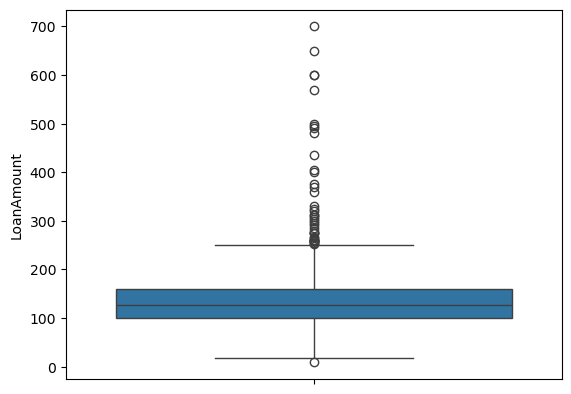

In [111]:
sns.boxplot(df['LoanAmount'])
plt.show()

In [112]:
q1=np.percentile(df['LoanAmount'],25)
q3=np.percentile(df['LoanAmount'],75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

10.0
250.0


In [113]:
outlier=[]
for x in df['LoanAmount']:
    if (x>upper or x>lower):
        outlier.append(x)
print(outlier)
print('total number of outlier',len(outlier))
(len(outlier)/len(df)*100)

[127.5, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0, 168.0, 70.0, 109.0, 114.0, 17.0, 125.0, 100.0, 76.0, 133.0, 115.0, 104.0, 116.0, 112.0, 151.0, 191.0, 122.0, 110.0, 35.0, 120.0, 201.0, 74.0, 106.0, 114.0, 320.0, 127.5, 100.0, 144.0, 110.0, 80.0, 47.0, 75.0, 134.0, 96.0, 88.0, 44.0, 144.0, 120.0, 144.0, 100.0, 120.0, 112.0, 134.0, 286.0, 97.0, 96.0, 135.0, 180.0, 144.0, 120.0, 99.0, 165.0, 127.5, 116.0, 258.0, 126.0, 312.0, 125.0, 136.0, 172.0, 97.0, 81.0, 95.0, 187.0, 113.0, 176.0, 110.0, 180.0, 130.0, 111.0, 127.5, 167.0, 265.0, 50.0, 136.0, 99.0, 104.0, 210.0, 175.0, 131.0, 81.0, 122.0, 25.0, 127.5, 137.0, 50.0, 115.0, 131.0, 133.0, 151.0, 127.5, 127.5, 100.0, 225.0, 120.0, 216.0, 94.0, 136.0, 139.0, 152.0, 127.5, 118.0, 185.0, 154.0, 85.0, 175.0, 259.0, 180.0, 44.0, 81.0, 194.0, 93.0, 370.0, 127.5, 160.0, 182.0, 650.0, 74.0, 70.0, 25.0, 102.0, 84.0, 88.0, 242.0, 129.0, 185.0, 168.0, 175.0, 122.0, 187.0, 100.0, 70.0, 30.0, 225.0, 125.0, 118.0, 152.0, 244.0, 113.0, 50.0, 600.0, 

99.82935153583618

In [114]:
df['LoanAmount']=np.where(df['LoanAmount']>upper,upper,
                         np.where(df['LoanAmount']<lower,lower,df['LoanAmount']))

In [115]:
outlier=[]
for x in df['LoanAmount']:
    if (x>upper or x<lower):
        outlier.append(x)
print(outlier)
print('total number of outlier',outlier)

[]
total number of outlier []


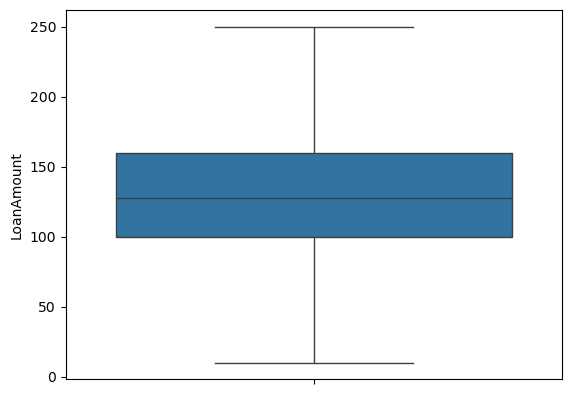

In [117]:
sns.boxplot(df['LoanAmount'])
plt.show()

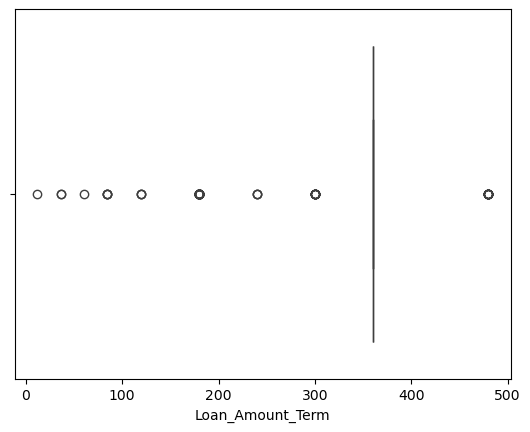

In [118]:
sns.boxplot(x=df['Loan_Amount_Term'])
plt.show()


In [119]:
q1=np.percentile(df['Loan_Amount_Term'],25)
q3=np.percentile(df['Loan_Amount_Term'],75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [130]:
outlier=[]
for x in df['Loan_Amount_Term']:
    if (x>upper or x<lower):
        outlier.append(x)
print(outlier)
print(len(outlier))
print('percentage:',(len(outlier)/len(df)*100))

[120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 300.0, 240.0, 180.0, 120.0, 180.0, 180.0, 480.0, 180.0, 180.0, 480.0, 120.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 180.0, 480.0, 180.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 60.0, 180.0, 180.0, 480.0, 180.0, 36.0, 180.0, 300.0, 480.0, 480.0, 84.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 480.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 180.0, 300.0, 300.0, 180.0, 240.0, 300.0, 300.0, 180.0, 180.0, 180.0, 180.0, 300.0, 84.0, 12.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 36.0, 180.0, 480.0, 84.0, 84.0, 180.0, 240.0, 180.0, 180.0, 180.0, 180.0]
88
percentage: 14.332247557003258


In [131]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].clip(lower=lower,upper=upper)
    

In [133]:
outlier=[]
for x in df['Loan_Amount_Term']:
    if (x>upper or x<lower):
        outlier.append(x)
print(outlier)

[]


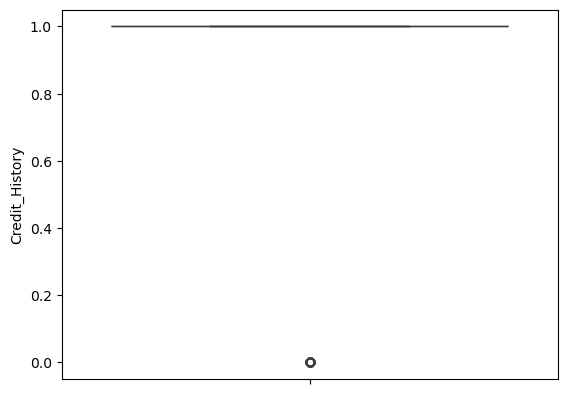

In [138]:
sns.boxplot(df['Credit_History'])
plt.show()

In [140]:
q1=np.percentile(df['Credit_History'],25)
q3=np.percentile(df['Credit_History'],75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [141]:
outlier=[]
for x in df['Credit_History']:
    if x<lower:
        outlier.append(x)
print(len(outlier))

0
